# Parameter spaces $\psi$ and $\Delta$ of $\kappa-sech^2$-type electron hole

In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib
import scipy.optimize as op
import plasmapy
from scipy import special as sp
import numba as nb
import math
%config InlineBackend.figure_format = 'svg'

In [2]:
plt.rcParams.update({'font.size': 16})
plt.rcParams.update({'lines.linewidth': 2})

## Formulas
- The potential is
$$\phi = \psi sech^2 \left(\frac{x}{\Delta}\right) $$
with
$$\psi = -6 \frac{
            \pi\frac{df_t}{d\xi}|_{\xi=0} - \frac{1}{\theta^2}\Re\left[U'_\kappa\left(\frac{u}{\theta}\right)\right]
        }
        {
            \pi\frac{d^3f_t}{d\xi^3}|_{\xi=0} + \frac{1}{\theta^4}\Re\left[U'''_\kappa\left(\frac{u}{\theta}\right)\right]
        }$$
and
$$\Delta^{-1} = \frac{1}{2}\sqrt{
            \pi\frac{df_t}{d\xi}|_{\xi=0}-\frac{1}{\theta^2}\Re\left[U'_\kappa\left(\frac{u}{\theta}\right)\right]
    }$$
- For the given $\psi$ and $\Delta$
$$\frac{df_t}{d\xi}|_{\xi=0} = \frac{1}{\pi} \left\{
\frac{4}{\Delta^2} + \frac{1}{\theta^2} \Re\left[U'_\kappa\left(\frac{u}{\theta}\right)\right]
\right\}
$$
and
$$\frac{d^3f_t}{d\xi^3}|_{\xi=0} = -\frac{1}{\pi} \left\{
\frac{24}{\Delta^2\psi} + \frac{1}{\theta^4}\Re\left[U'''_\kappa\left(\frac{u}{\theta}\right)\right]
\right\}
$$
- The trapped distribution is constructed as
$$f_t =N_\kappa \left(1+\frac{u^2}{\kappa\theta^2}\right)^{-\kappa} \left\{1-\frac{2\kappa W}{\kappa\theta^2+u^2}\left[1-\frac{2(\kappa+1)u^2}{\kappa\theta^2+u^2}\right]\right\}
+ \frac{df_t}{d\xi}|_{\xi=0} \xi + \frac{d^3f_t}{d\xi^3}|_{\xi=0} \frac{\xi^3}{6}
        $$
with 
$$f_u^{\pm}(W) = N_\kappa \left[1+\frac{(\pm\sqrt{2W}+u)^2}{\kappa\theta^2}\right]^{-\kappa}$$
and
$$N_\kappa = \frac{1}{\sqrt{\pi\kappa\theta^2}} \frac{\Gamma(\kappa)}{\Gamma(\kappa-1/2)}$$

In [3]:
import mpmath as mp
mp.dps=10
# para_in = 'theta'
para_in = 'T'

def Un_nonvec(u,kappa,n):
    if para_in == 'theta':
        theta = np.sqrt(2)
    elif para_in == 'T':
        theta = np.sqrt(2.0-3.0/kappa)
    zeta = u/theta
    fac1= (1j/2)**(n+1)
    fac2= np.math.factorial(n)*sp.gamma(2*kappa+n)*sp.gamma(kappa+1)/kappa**(1.5+n/2)/sp.gamma(2*kappa-1)/sp.gamma(kappa+1+n)
    z = 0.5*(1.0+1j*zeta/np.sqrt(kappa))
    hyp = np.complex128(mp.hyp2f1(1+n,2*kappa+n,kappa+1+n,z))
    return (fac1*fac2*hyp).real

Un = np.vectorize(Un_nonvec)

In [4]:
#test psi in (5e-4,5e-1) and delta in (1e-1,5e1)
psi_list = 5*10**np.linspace(-5,0,num=100)
delta_list = 5*10**np.linspace(-2,1,num=100)
Psi,Delta = np.meshgrid(psi_list,delta_list)

In [5]:
def nonvec_ft0(psi,delta,kappa):
    r = 0
    kt2 = kappa*theta**2
    fac = math.gamma(kappa)/math.gamma(kappa-0.5)/(math.pi*kt2)**0.5
    dft_dx = (4.0/delta**2 + Un(u,kappa,1)/theta**2)/np.pi
    d3ft_dx3 = (-24.0/psi/delta**2 - Un(u,kappa,3)/theta**4)/np.pi
    d2ft_dx2 = fac*(1+u**2/kt2)**(-kappa) * (2*kappa/(kt2+u**2)) * (1-2*(kappa+1)*u**2/(kt2+u**2))
    test = dft_dx + d2ft_dx2*(2*psi)**0.5 + d3ft_dx3*psi
    r=fac*(1+u**2/kt2)**(-kappa) * (1+psi * (2*kappa/(kt2+u**2)) * (1-2*(kappa+1)*u**2/(kt2+u**2)) ) + dft_dx*(2*psi)**0.5 + d3ft_dx3*(2*psi)**1.5/6
    return r
ft0 = np.vectorize(nonvec_ft0)

In [6]:
def nonvec_ftv(v,psi,delta):
    r = 0
    w = (v**2)/2-psi
    kt2 = kappa*theta**2
    fac = math.gamma(kappa)/math.gamma(kappa-0.5)/(math.pi*kt2)**0.5
    dft_dx = (4.0/delta**2 + Un(u,kappa,1)/theta**2)/np.pi
    d3ft_dx3 = (-24.0/psi/delta**2 - Un(u,kappa,3)/theta**4)/np.pi
    r=fac*(1+u**2/kt2)**(-kappa) * (1-w * (2*kappa/(kt2+u**2)) * (1-2*(kappa+1)*u**2/(kt2+u**2)) ) + dft_dx*(-2*w)**0.5 + d3ft_dx3*(-2*w)**1.5/6
    return r
ftv = np.vectorize(nonvec_ftv)

In [7]:
u = 0.1
kappa = 2
theta = np.sqrt(2.0-3.0/kappa)
ft1 = ft0(Psi,Delta,kappa)

kappa = 2.5
theta = np.sqrt(2.0-3.0/kappa)
ft2 = ft0(Psi,Delta,kappa)

kappa = 10
theta = np.sqrt(2.0-3.0/kappa)
ft3 = ft0(Psi,Delta,kappa)

In [8]:
u = 0.4
kappa = 2
theta = np.sqrt(2.0-3.0/kappa)
ft4 = ft0(Psi,Delta,kappa)

kappa = 2.5
theta = np.sqrt(2.0-3.0/kappa)
ft5 = ft0(Psi,Delta,kappa)

kappa = 10
theta = np.sqrt(2.0-3.0/kappa)
ft6 = ft0(Psi,Delta,kappa)

In [9]:
u = 0.7
kappa = 2
theta = np.sqrt(2.0-3.0/kappa)
ft7 = ft0(Psi,Delta,kappa)

kappa = 2.5
theta = np.sqrt(2.0-3.0/kappa)
ft8 = ft0(Psi,Delta,kappa)

kappa = 10
theta = np.sqrt(2.0-3.0/kappa)
ft9 = ft0(Psi,Delta,kappa)

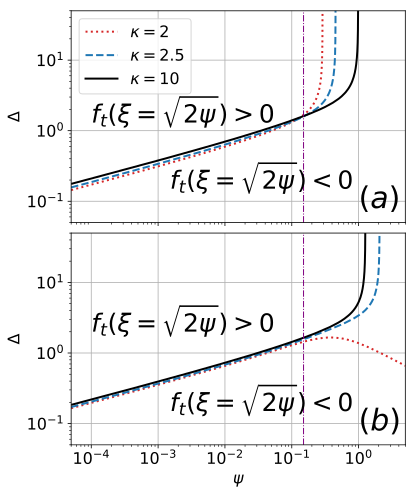

In [10]:
psi_ticks = 10**np.linspace(-3,0,num=4)
fig = plt.figure(figsize=(6,8))
ax1 = plt.subplot(211)
plt.contour(Psi,Delta,ft1,levels=[0],colors='tab:red',linestyles=':')
plt.contour(Psi,Delta,ft2,levels=[0],colors='tab:blue',linestyles='--')
plt.contour(Psi,Delta,ft3,levels=[0],colors='black',linestyles='-')
plt.plot([],[],color='tab:red',linestyle=':',label=r'$\kappa=2$')
plt.plot([],[],color='tab:blue',linestyle='--',label=r'$\kappa=2.5$')
plt.plot([],[],color='black',linestyle='-',label=r'$\kappa=10$')
plt.yscale('log')
plt.xscale('log')
plt.xticks(psi_ticks,[])
plt.ylabel(r'$\Delta$')
plt.text(1e-4,1.3e0,r'$f_t(\xi=\sqrt{2\psi})>0$',fontsize=25)
plt.text(1.5e-3,1.5e-1,r'$f_t(\xi=\sqrt{2\psi})<0$',fontsize=25)
plt.text(1,8e-2,r'$(a)$',fontsize=30)
plt.axvline(0.15,linestyle='-.',color='purple',linewidth='1')
plt.grid()
plt.legend(loc=2)

ax2 = plt.subplot(212)
plt.contour(Psi,Delta,ft4,levels=[0],colors='tab:red',linestyles=':')
plt.contour(Psi,Delta,ft5,levels=[0],colors='tab:blue',linestyles='--')
plt.contour(Psi,Delta,ft6,levels=[0],colors='black',linestyles='-')
plt.yscale('log')
plt.xscale('log')
plt.ylabel(r'$\Delta$')
plt.xlabel(r'$\psi$')
plt.text(1e-4,2e0,r'$f_t(\xi=\sqrt{2\psi})>0$',fontsize=25)
plt.text(1.5e-3,1.5e-1,r'$f_t(\xi=\sqrt{2\psi})<0$',fontsize=25)
plt.text(1,8e-2,r'$(b)$',fontsize=30)
plt.axvline(0.15,linestyle='-.',color='purple',linewidth='1')
plt.grid()

plt.subplots_adjust(hspace = 0.05,wspace=0.26)
# plt.savefig('../3-submit to ppcf/1-1st_revised_manuscript/1_parameter_space.pdf',dpi=600,bbox_inches = 'tight')
plt.show()

In [11]:
u = 0.1

psi = 0.1
delta = 10
v1 = np.linspace(-np.sqrt(2*psi),np.sqrt(2*psi),num=200)

kappa = 2
theta = np.sqrt(2.0-3.0/kappa)
ftv1 = ftv(v1,psi,delta)

kappa = 2.5
theta = np.sqrt(2.0-3.0/kappa)
ftv2 = ftv(v1,psi,delta)

kappa = 10
theta = np.sqrt(2.0-3.0/kappa)
ftv3 = ftv(v1,psi,delta)

In [12]:
psi = 0.4
delta = 10
v2 = np.linspace(-np.sqrt(2*psi),np.sqrt(2*psi),num=200)

kappa = 2
theta = np.sqrt(2.0-3.0/kappa)
ftv4 = ftv(v2,psi,delta)

kappa = 2.5
theta = np.sqrt(2.0-3.0/kappa)
ftv5 = ftv(v2,psi,delta)

kappa = 10
theta = np.sqrt(2.0-3.0/kappa)
ftv6 = ftv(v2,psi,delta)

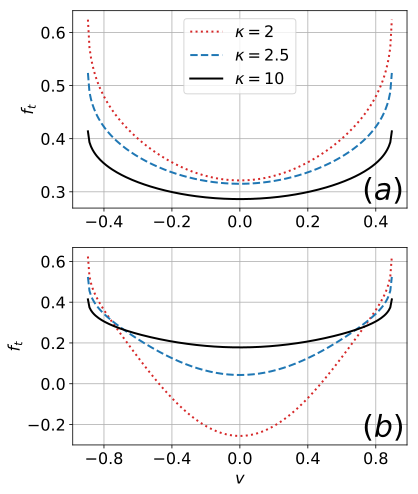

In [13]:
fig = plt.figure(figsize=(6,8))
ax1 = plt.subplot(211)

plt.plot(v1,ftv1,label=r'$\kappa=2$',color='tab:red',linestyle=':')

plt.plot(v1,ftv2,label=r'$\kappa=2.5$',color='tab:blue',linestyle='--')

plt.plot(v1,ftv3,label=r'$\kappa=10$',color='black',linestyle='-')

plt.ylabel(r'$f_t$')
plt.text(0.36,0.285,r'$(a)$',fontsize=30)
plt.grid()
plt.legend()

ax2 = plt.subplot(212)
plt.plot(v2,ftv4,label=r'$\kappa=2$',color='tab:red',linestyle=':')

plt.plot(v2,ftv5,label=r'$\kappa=2.5$',color='tab:blue',linestyle='--')

plt.plot(v2,ftv6,label=r'$\kappa=10$',color='black',linestyle='-')
plt.xlabel(r'$v$')
plt.ylabel(r'$f_t$')
plt.text(0.72,-0.26,r'$(b)$',fontsize=30)
plt.xticks([-0.8,-0.4,0,0.4,0.8])
plt.grid()

# plt.tight_layout()
# plt.savefig('../2-submit to pre/0-origin(delete smooth EH section)/2_ft.pdf',dpi=600,bbox_inches = 'tight')
plt.show()